# In this notebook we are going to implement the forecasting using the "prophet" library by facebook

## Installing the prophet library

In [74]:
!pip install pystan

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import prophet

In [76]:
data = pd.read_csv("data.csv")
df = data.copy()
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    145 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [78]:
df.isnull().sum()

,0
Month,0
Thousands of Passengers,1


In [79]:
df.dropna(axis=0, inplace=True)

In [80]:
df.isnull().sum()

,0
Month,0
Thousands of Passengers,0


<Axes: >

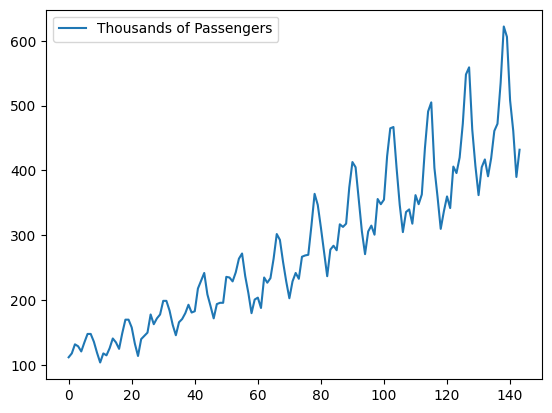

In [81]:
df.plot()

## prophet needs the datetime feature to be named as "ds" and the output feature to be named as "y"

In [82]:
df.columns = ["ds", "y"]

In [83]:
df.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [84]:
df['ds'] = pd.to_datetime(df['ds'])

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.4 KB


## Walking around prophet library

In [86]:
from prophet import Prophet

In [87]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic'

### Initializing "Prophet"

In [88]:
### Initializing the model
model = Prophet()
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe9x33rml/q4vk14cj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe9x33rml/mg9bg5kt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51834', 'data', 'file=/tmp/tmpe9x33rml/q4vk14cj.json', 'init=/tmp/tmpe9x33rml/mg9bg5kt.json', 'output', 'file=/tmp/tmpe9x33rml/prophet_model1uofdfzl/prophet_model-20250403172323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:23:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:23:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [89]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

### Creating future dates

In [90]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [91]:
## Making future dataframe
future_dataframe = model.make_future_dataframe(periods=365)

In [92]:
future_dataframe.tail(10)

,ds
499,1961-11-22
500,1961-11-23
501,1961-11-24
502,1961-11-25
503,1961-11-26
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


### OBSERVATION:
We can see that the main df is having data till 1960 year but the future_dataframe is ending in 1961 so it is creating 1 year/365 days data

### Training the model on future_dataframe data

In [93]:
future_prediction = model.predict(future_dataframe)
future_prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.406338,56.573406,114.431566,107.406338,107.406338,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,0.0,0.0,0.0,86.018883
1,1949-02-01,109.550561,50.152959,109.515542,109.550561,109.550561,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,0.0,0.0,0.0,79.495226
2,1949-03-01,111.487279,83.133424,138.428054,111.487279,111.487279,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,0.0,0.0,0.0,111.025581
3,1949-04-01,113.631502,77.409051,135.943854,113.631502,113.631502,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,0.0,0.0,0.0,108.719017
4,1949-05-01,115.706556,84.804040,143.306898,115.706556,115.706556,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,0.0,0.0,0.0,112.095281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1961-11-27,521.304699,471.308225,528.496325,520.774181,521.862613,-21.379004,-21.379004,-21.379004,-21.379004,-21.379004,-21.379004,0.0,0.0,0.0,499.925695
505,1961-11-28,521.405720,469.912607,527.074380,520.872694,521.966531,-23.080719,-23.080719,-23.080719,-23.080719,-23.080719,-23.080719,0.0,0.0,0.0,498.325001
506,1961-11-29,521.506741,466.512189,524.434653,520.970478,522.068177,-25.503297,-25.503297,-25.503297,-25.503297,-25.503297,-25.503297,0.0,0.0,0.0,496.003444
507,1961-11-30,521.607762,464.784549,521.297440,521.068337,522.171256,-28.605181,-28.605181,-28.605181,-28.605181,-28.605181,-28.605181,0.0,0.0,0.0,493.002580


## To use the - model.plot() - the model will be needing yhat term in it, so we can only use this function to plot the future prediction data only

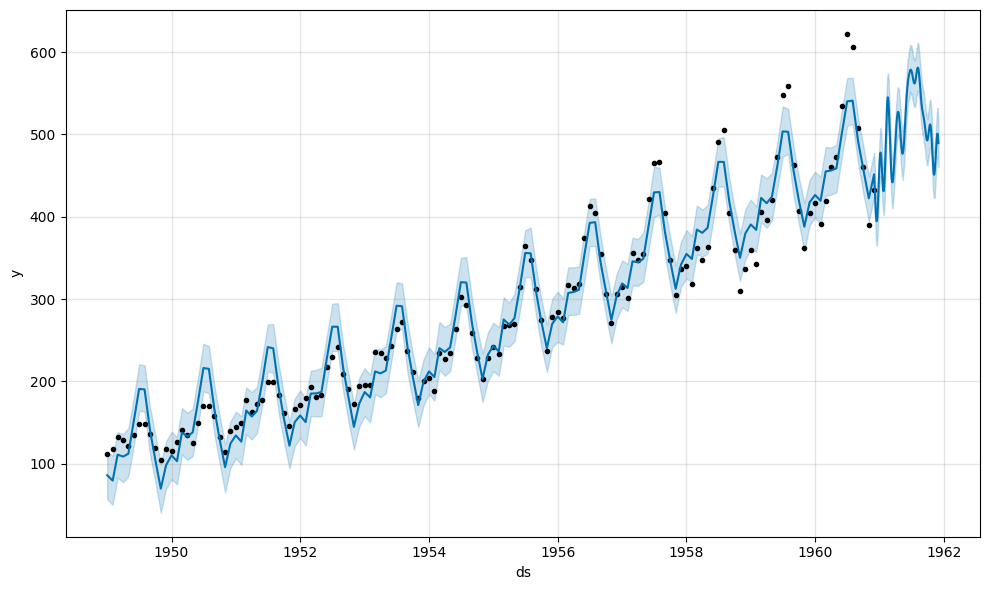

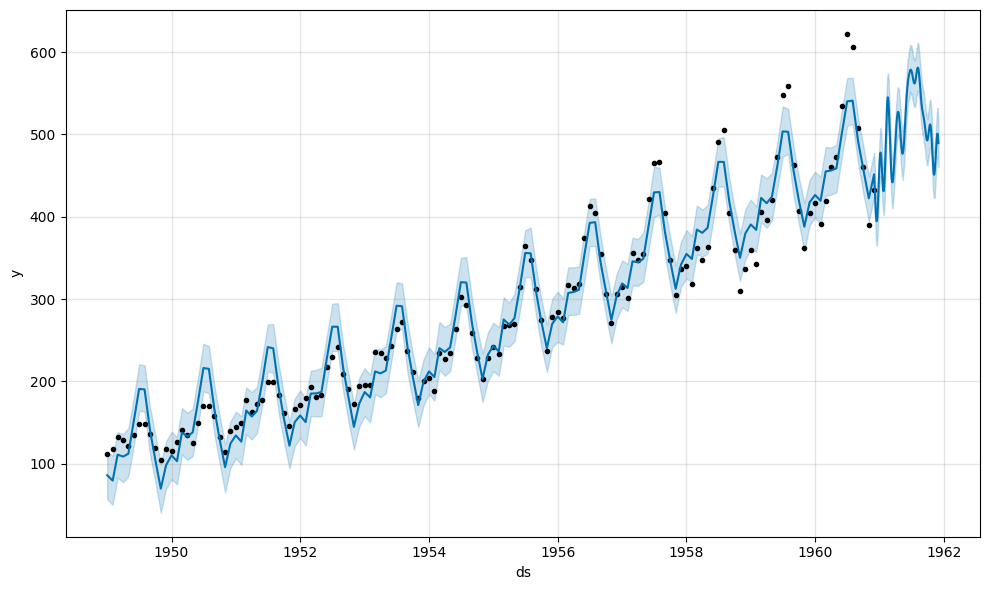

In [94]:
model.plot(future_prediction)

### Visualize each component [Trends, yearly]

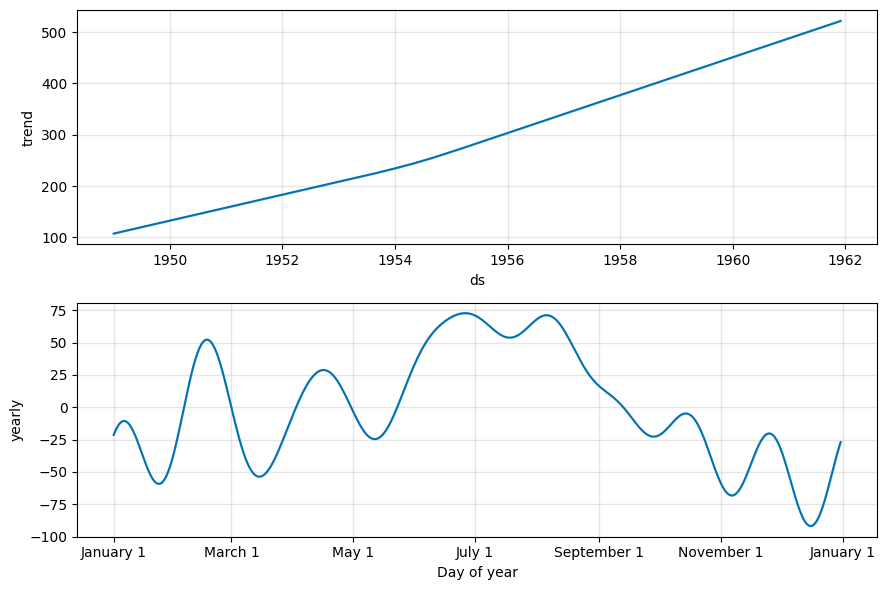

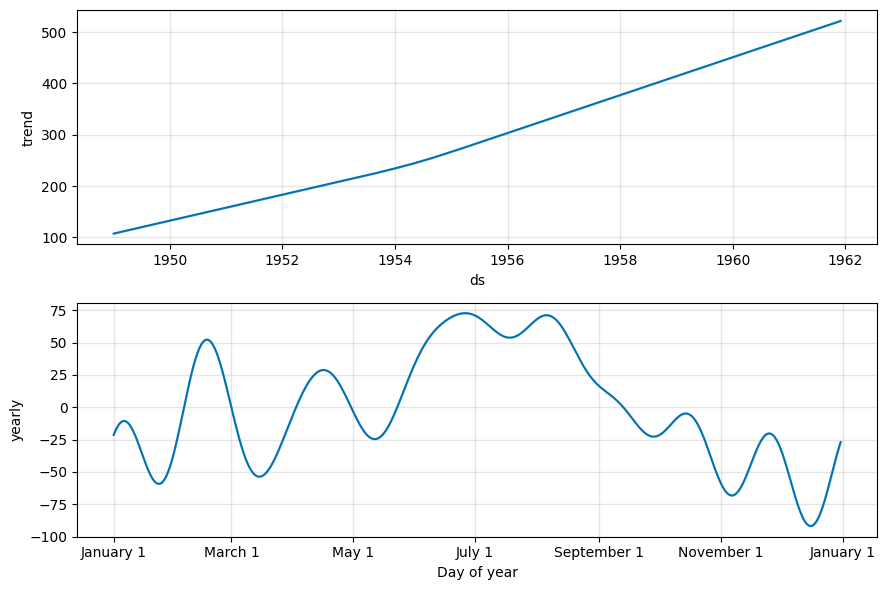

In [95]:
model.plot_components(future_prediction)

## Cross validation and performance metrics

In case of cross validation in time series, it automatically takes a certain amount of data as train dataset and another set of data as test data.

In [96]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', horizon='365 days', period='180 days')
df_cv.head()

INFO:prophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00


  0%|          | 0/19 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe9x33rml/m5510dak.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe9x33rml/c4ieuo_k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6379', 'data', 'file=/tmp/tmpe9x33rml/m5510dak.json', 'init=/tmp/tmpe9x33rml/c4ieuo_k.json', 'output', 'file=/tmp/tmpe9x33rml/prophet_model6iqunzx4/prophet_model-20250403172329.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:23:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:23:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe9x33rml/qavdag9w.json
DEBUG:cmdstanpy:input tempfil

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,158.547043,158.323520,158.753277,150.0,1951-01-18
1,1951-03-01,171.930554,171.199019,172.574645,178.0,1951-01-18
2,1951-04-01,160.294061,158.840287,161.635924,163.0,1951-01-18
3,1951-05-01,146.088671,143.872656,148.274715,172.0,1951-01-18
4,1951-06-01,181.775393,178.580943,184.795615,178.0,1951-01-18


### The performance_metrics takes the y and yaht value from the cross validated df i.e. df_cv in this case

In [97]:
### Performance metrics
from prophet.diagnostics import performance_metrics
df_performance = performance_metrics(df_cv)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,1089.760435,33.011520,25.888183,0.078584,0.073832,0.079624,0.227273
1,42 days,1015.074527,31.860234,25.207161,0.076726,0.073832,0.077409,0.181818
2,46 days,909.815509,30.163148,24.622042,0.078579,0.078888,0.078319,0.136364
3,47 days,1044.416363,32.317431,26.737368,0.081351,0.085408,0.081498,0.136364
4,48 days,1034.025454,32.156266,26.194461,0.079480,0.085408,0.079693,0.181818
...,...,...,...,...,...,...,...,...
165,359 days,766.600337,27.687548,21.654293,0.068947,0.062001,0.068551,0.295455
166,360 days,770.123742,27.751103,21.933194,0.069808,0.062001,0.069431,0.272727
167,362 days,864.691069,29.405630,23.203429,0.068900,0.062001,0.069029,0.272727
168,364 days,838.273512,28.952953,22.134290,0.065984,0.050250,0.066210,0.272727


### Plotting cross validation df and the metric (mae/rmse/mse)

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


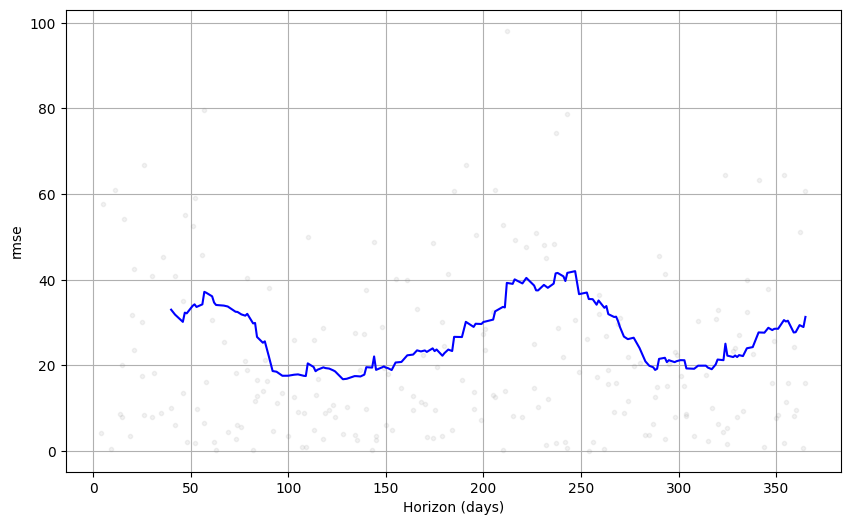

In [98]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')